In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib qt

In [7]:
def csv_plot_RS(csv,plotear=True):
    """Agarra un archivo csv (del osciloscopio Rohde & Scharz)
     y lo grafica
     La variable csv es un txt con el nombre del archivo csv
     Cuando sale del R&S, el nombre tiene la estructura:
     RefCurve_YYYY-MM-DD_N_HHMMSS.Wfm.csv
     Donde N es un numero que ordena las wfm de ese dia
     """
    data = pd.read_csv(csv,sep=';',names=['x'])
    i = csv.rfind('Curve') + len('Curve') + 1
    j = csv.find('.Wfm')
    text = csv[i:j] # text = 'YYYY-MM-DD_HHMMSS'
    x = data['x']
    if plotear==True:
        plt.plot(x)
        plt.grid()
        plt.title(text)
        plt.show()
    return x

### Análisis de la señal de dos tonos

In [8]:
#wfm = ['datos_2Tonos/' + x 
#        for x in os.listdir('datos_2Tonos') 
#        if x.endswith('Wfm.csv')]

wfm_fft = ['RefCurve_2021-12-22_29_234236.Wfm.csv',
           'RefCurve_2021-12-23_2_000352.Wfm.csv']

wfm_normal = ['RefCurve_2021-12-22_1_231924.Wfm.csv',
              'RefCurve_2021-12-22_25_232048.Wfm.csv',
              'RefCurve_2021-12-22_26_233158.Wfm.csv',
              'RefCurve_2021-12-22_27_233346.Wfm.csv',
              'RefCurve_2021-12-22_28_233351.Wfm.csv',
              'RefCurve_2021-12-22_30_234243.Wfm.csv',
              'RefCurve_2021-12-22_31_234249.Wfm.csv',
              'RefCurve_2021-12-22_32_234342.Wfm.csv',
              'RefCurve_2021-12-22_33_234346.Wfm.csv',
              'RefCurve_2021-12-23_0_000334.Wfm.csv',
              'RefCurve_2021-12-23_1_000341.Wfm.csv',
              'RefCurve_2021-12-23_3_000358.Wfm.csv',
              'RefCurve_2021-12-23_4_000457.Wfm.csv',
              'RefCurve_2021-12-23_5_000522.Wfm.csv',
              'RefCurve_2021-12-23_6_000526.Wfm.csv',
              'RefCurve_2021-12-23_7_001025.Wfm.csv',
              'RefCurve_2021-12-23_8_001030.Wfm.csv']



In [9]:
wfm = ['RefCurve_2021-12-22_30_234243.Wfm.csv',
              'RefCurve_2021-12-22_31_234249.Wfm.csv',
              'RefCurve_2021-12-22_32_234342.Wfm.csv',
              'RefCurve_2021-12-22_33_234346.Wfm.csv']

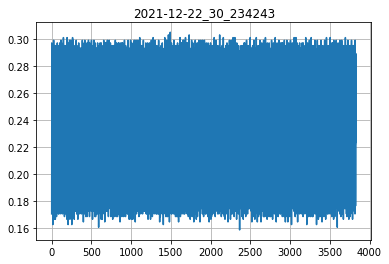

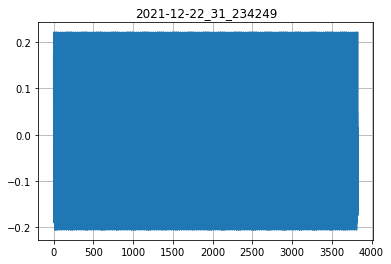

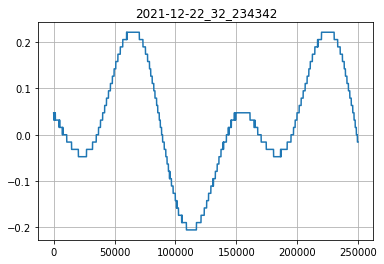

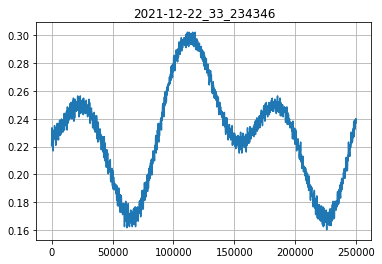

In [10]:
%matplotlib inline
for x in wfm:
    punto = x.find('.')
    x = x[9:punto]
    csv_plot_RS('datos_2Tonos/' + x + '/RefCurve_' + x + '.Wfm.csv')

In [ ]:
#%matplotlib qt
# Grafico de la salida de la FPGA (grafico verde en las fotos)
csv_plot_RS('datos_2Tonos/' + '22-22_32021-1_234342/RefCurve_22-22_32021-1_234342.Wfm.csv')

Claramente las últimas dos pertenecen a la misma toma de datos. Tambien son las de las ultimas screenshots

<img src="datos_2Tonos\Screenshot_2021-12-23_0_001020.png" width="300">
<img src="datos_2Tonos\Screenshot_2021-12-23_1_001051.png" width="300">


Ahora enfoquémonos en los pulsos. Queremos ver que el ruido que ya tenían filtrado de origen "transporta" el filtro a la señal final del JAWS.
A continuación tomamos los datos de los txt de los pulsos (lo que va a la FPGA), y repetimos el análisis hecho en la primer parte (L6):

In [6]:
txt = 'datos_2Tonos/0p500_3p125_dosTonos.txt'

def txt2Pulsos(txt):
    pulsos = open(txt,'r').read()
    return [int(x) for x in pulsos[0::2]]

def decimador(pulsos,N):
    """Agarra la lista pulsos, que es una
       lista de 1's y 0's (ints) y hace un promedio 
       temporal tomando chunks de N pulsos.
       Devuelve una lista de largo 'LargoOriginal/N'
       conteniendo los promedios de cada chunk de
       N pulsos. La ultima sublista es el resto, no
       necesariamente tenga longitud N.
       Se puede usar para decimar listas de floats tambien
       (no solo 0's y 1's)
       """
    chunks = [pulsos[i:i+N] for i in range(0,len(pulsos),N)]
    promedios = []
    for c in chunks:
        promedios.append(np.mean(c))
    return promedios

In [31]:
len(decimador(y,100))

16000

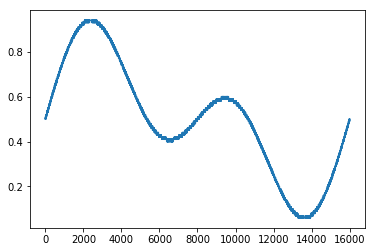

In [32]:
y = txt2Pulsos(txt)
#plt.plot(datos[:100],'.k')
plt.plot(decimador(y,100))

Hacemos la FFT de estos pulsos

##### scipy.fft:

In [8]:
from scipy.fft import fft, fftfreq
N = len(y)
T = 1/5e9 # en segundos
t = T*np.arange(N)
yf = fft(y)
tf = fftfreq(N,T)[:N//2]

In [24]:
plt.plot(tf,2.0/N*np.abs(yf[0:N//2]),
         linewidth = 0.5,
         color = 'k')
plt.grid()
plt.yscale('log')
#plt.xscale('log')
plt.show()

##### numpy.fft:

In [16]:
str1 = 'datos_2Tonos/2021-12-22_1_231924/RefCurve_2021-12-22_1_231924.Wfm.csv'
str2 = 'datos_2Tonos/2021-12-22_32_234342/RefCurve_2021-12-22_32_234342.Wfm.csv'
str3 = 'datos_2Tonos/2021-12-22_1_231924/RefCurve_2021-12-22_1_231924.Wfm.csv'
%matplotlib qt

y = csv_plot_RS(str3)
U = np.fft.fft(y)
T = 5e-5
t = T*np.arange(len(y))
freq = np.fft.fftfreq(t.shape[-1],d=T)
N = len(freq)
U = U[:N//2]
freqs = freq[:N//2] #frecuencias positivas
Uy = np.sqrt(U.real**2+U.imag**2) #valores absolutos

In [44]:
#plt.figure(figsize=(10, 6))
%matplotlib qt
plt.title("ffty")
#plt.plot(freqs, Ue,label='FFT($e_q$)',zorder=0,color="y")
plt.plot(freqs,Uy,label='FFT($y$)',zorder=1,color="k",marker='o')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(10**-3,10**4)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.legend()
plt.show()

In [50]:
from scipy import constants
M = 4996
f = 5e9
n = 0.25 # n = A/2
V = n*M*constants.h/(2*constants.e)*f
print(V)

0.012913622383644748


In [41]:
def fft_plot(csv):
    """Agarra el path del csv, le hace FFT, lo grafica"""
    y = csv_plot_RS(csv,plotear=False)
    U = np.fft.fft(y)
    T = 4.16666e-005 # este tiempo en segundos se saca de los datos del R&S
    t = T*np.arange(len(y))
    freq = np.fft.fftfreq(t.shape[-1],d=T)
    N = len(freq)
    U = U[:N//2]
    freqs = 1e-3*freq[:N//2] #frecuencias positivas (en kHz)
    Uy = np.sqrt(U.real**2+U.imag**2) #valores absolutos
    #plt.plot(freqs, Ue,label='FFT($e_q$)',zorder=0,color="y")
    plt.cla()
    plt.plot(freqs,Uy,label='FFT($y$)',zorder=1,color="k",marker='o')
    plt.title("ffty")
    plt.yscale('log')
    #plt.xscale()
    plt.grid()
    #plt.xlim(10**-3,10**4)
    plt.xlabel('Frecuencia [kHz]')
    plt.ylabel('Magnitud [dB]')
    plt.legend()
    plt.show()

In [42]:
dostonos_csv_jaws = 'datos_2Tonos/2021-12-22_30_234243/RefCurve_2021-12-22_30_234243.Wfm.csv'
%matplotlib qt
fft_plot(dostonos_csv_jaws)

Lo anterior grafica la FFT con enorme detalle en las bajas frecuencias, se ve claramente los dos picos que lo más probable es que sean de los dos tonos principales de la señal (falta comprobarlo)
A continuacion graficamos la señal directamente. La escala temporal es mucho menor para que puedan entrar varios períodos, esto lo hace el osciloscopio automáticamente. Hay que modificar el código anterior para tener la escala correcta y por lo menos llegar a 12kHz como en los screenshots

In [24]:
y = csv_plot_RS(dostonos_csv_jaws)

In [17]:
# definimos tiempos = []
tiempos = list(filter(lambda x: x.startswith('2021'),os.listdir('datos_2Tonos')))
# ahora ordenamos esta lista con la cronologia real
t0 = tiempos[0]
def tiempoReal(t):
    """YYYY_..._SS --> tiempo real (~7 hs menos), en formato pandas"""
    fechaHora = t[:10] + '_' + t[-6:]
    tiempo = pd.to_datetime(fechaHora,format='%Y-%m-%d_%H%M%S')
    return tiempo - pd.Timedelta('07:48:00')

In [18]:
def nombre_csv(t):
    n1 = 'datos_2Tonos/'
    n2 = '/RefCurve_'
    n3 = '.csv'
    return n1 + t + n2 + t + n3

def nombre_wfmcsv(t):
    n1 = 'datos_2Tonos/'
    n2 = '/RefCurve_'
    n3 = '.Wfm.csv'
    return n1 + t + n2 + t + n3

In [1]:
tiempos[0]

NameError: name 'tiempos' is not defined

In [44]:
i = 1
print(tiempoReal(tiempos[i]))
print(nombre_wfmcsv(tiempos[i]))

2021-12-22 15:32:48
datos_2Tonos/2021-12-22_25_232048/RefCurve_2021-12-22_25_232048.Wfm.csv


In [38]:
csv = nombre_wfmcsv(tiempos[1])
csv_plot_RS(csv);